In [145]:
import pandas as pd
df=pd.read_csv('/Users/nirbhaysedha/Documents/Customer_churn_Predictor/Customer_Churn_Modeling/Churn_Modelling.csv')

In [146]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
df.drop(columns=['Surname','CustomerId','RowNumber'],inplace=True)

In [148]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

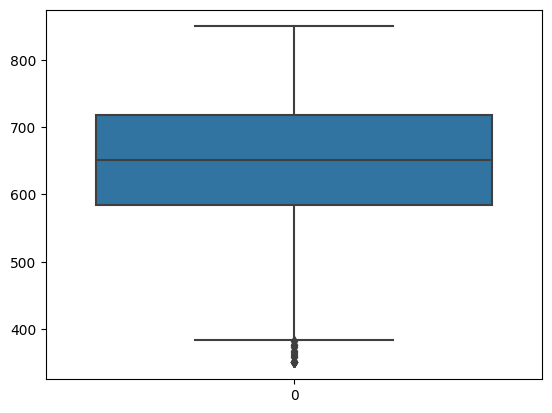

In [149]:
import seaborn as sns
sns.boxplot(df['CreditScore'])

<Axes: >

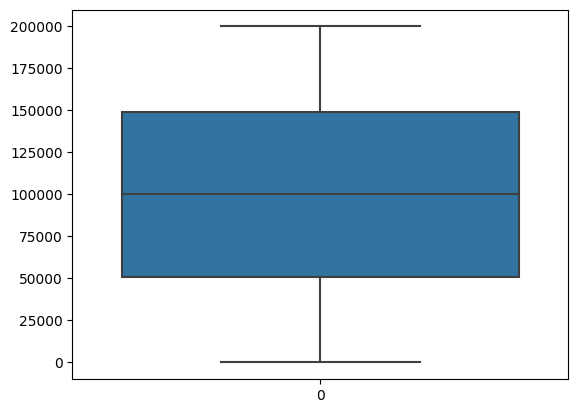

In [150]:
sns.boxplot(df['EstimatedSalary'])

In [151]:
from sklearn.compose import ColumnTransformer

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
transformer=ColumnTransformer([('first',OneHotEncoder(drop='first'),['Geography','Gender']),
                                 ('second',StandardScaler(),['Balance','CreditScore','EstimatedSalary'])],
                                 remainder='passthrough')

In [153]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [156]:
# Apply the transformations to x_train and x_test
x_train_t = transformer.fit_transform(x_train)
x_test_t = transformer.transform(x_test)

In [157]:
x_train_t.shape

(8000, 11)

In [158]:
from sklearn.decomposition import PCA
extract=PCA(n_components=8)

In [159]:
x_train_t=extract.fit_transform(x_train_t)
x_test_t=extract.transform(x_test_t)

In [160]:
x_train_t.shape

(8000, 8)

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
model1=LogisticRegression()
model1.fit(x_train_t,y_train)
model1_pred=model1.predict(x_test_t)
print("accuaracy",accuracy_score(y_test,model1_pred)*100,"%")

accuaracy 81.6 %


In [173]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=9,p=2)
model2.fit(x_train_t,y_train)
model2_pred=model2.predict(x_test_t)
print("accuracy_Score",accuracy_score(y_test,model2_pred)*100,"%")

accuracy_Score 83.7 %
